# Task 6 -- An application: Bertrand's paradox (probability) 

Consider the [Bertrand paradox](https://en.wikipedia.org/wiki/Bertrand_paradox_(probability)).

For each of the three cases generate a sample of 100 elements (chords) and compute the ratio of the chords bigger than the side of the equilateral triangle inscribed in the circle. 
   
The circle radius is equal with 1 and the set of chords will contain the cartesian coordinates of the edges of the chords. The origin of the coordinate system is in the origin of the circle.   

Draw using matplotlib each set of chords for each case respectively.


# Solution:

* for the third method I used some math to solve it 
  and I coudn't really exaplin it in comments,
  so I attached a document with the explications: []()

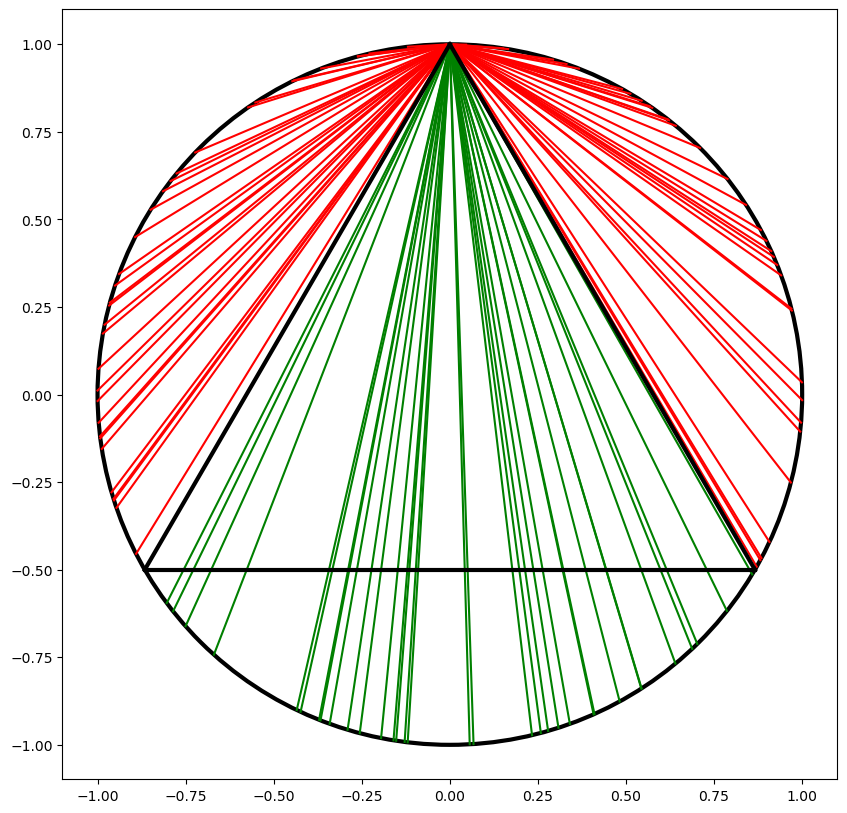

Ratio is: 0.33


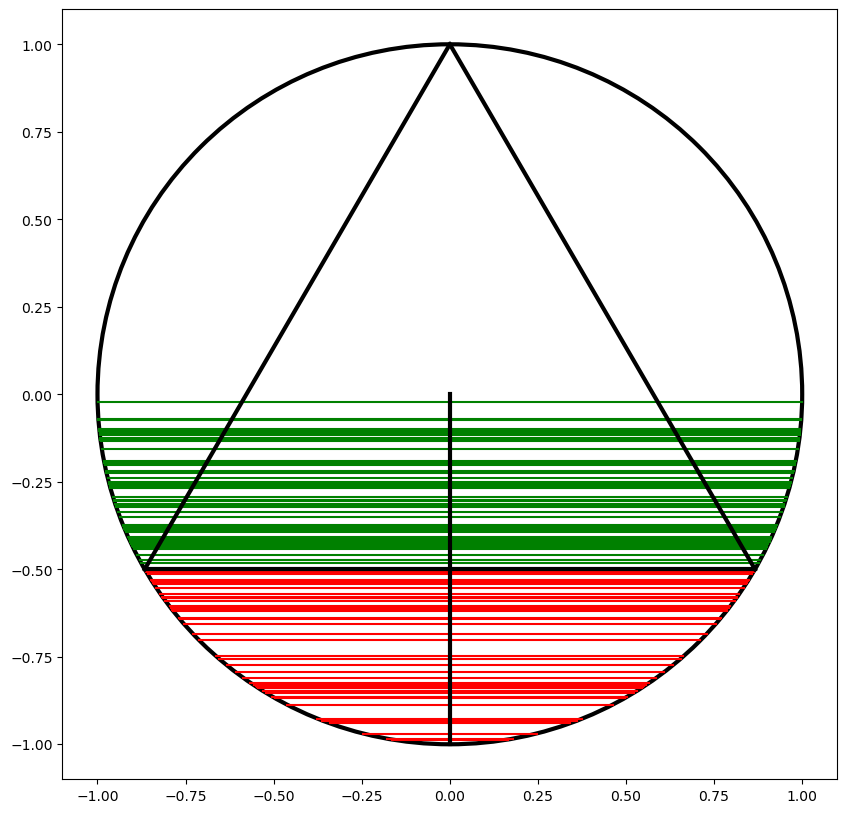

Ratio is: 0.54


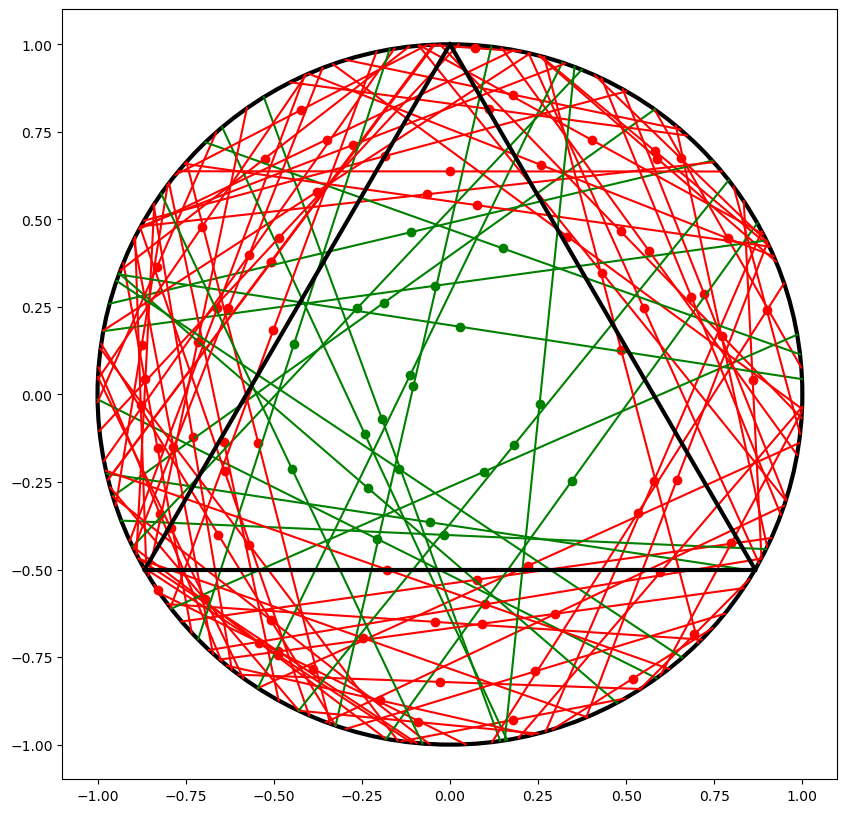

Ratio is: 0.21


In [1]:
from math import cos, sin, pi, sqrt
from matplotlib import pyplot as plt
from random import uniform, random


# convert from polar to cartesian coordinates
def polar(r, theta):
    x = r*cos(theta)
    y = r*sin(theta)
    return (x, y)


# function to compute distance between two cartesian coordinates
def d(x, y):
    d = (x[0] - y[0])**2 + (x[1] - y[1])**2
    return sqrt(d)


# function to plot a line
def plot_line(p1, p2, **kwargs):
    color = kwargs.get('color', None)
    zorder = kwargs.get('zorder', None)
    linewidth = kwargs.get('linewidth', None)
    plt.plot(*zip(p1, p2), color = color, zorder = zorder, linewidth = linewidth)
    

# function to prep the "canvas"
def painting(r):
    plt.figure(figsize=(10,10))
    
    # circle
    circle = plt.Circle((0, 0), r, color='black', fill=False, linewidth=3)
    # gca - get current axes
    plt.gca().add_artist(circle)
    
    # triangle points
    top   = polar(r, pi/2) # top_x = r*cos(pi/2) = 1; top_y = r*sin(pi/2) = 0
    right = polar(r, -pi/6) # angle is -pi/6 = (pi/2-(2*pi)/3)
    left  = polar(r, 7*pi/6) # angle is 7*pi/6 = (pi/2+(2*pi)/3)
    
    triangle_side = d(top, right)
    
    # draw triangle
    plot_line(top, right, color='black', zorder=10, linewidth=3)
    plot_line(top, left, color='black', zorder=10, linewidth=3)
    plot_line(right, left, color='black', zorder=10, linewidth=3)        
    
    return top, triangle_side, r


# method 1 - random endpoints
# the easiest
# generate two uniform random variables on the interval (0,2pi) to describe the angles of the two points
def method1():
    # get what we need from the canvas
    top, triangle_side, r = painting(1)
    
    # keeps the no of chords bigger than side of triangle
    bigger = 0
    
    for i in range(100):
        # generate a random point from (0,2pi)
        # used uniform as it returns a random floating number between the two specified numbers (both included)
        point = polar(r, uniform(0, 2*pi))
        
        # d(top, point) calculate the len of the chord as the distance between the top of the triangle and the generated point 
        
        # if greater than triangle side
        if d(top, point) > triangle_side:
            # color it green
            color = 'g' 
            # increase no of chords bigger than side of triangle
            bigger += 1
        else:
            # otherwise color it red
            color = 'r'  
            
        # plot the generated line with its color
        plot_line(top, point, color = color)

    plt.show()
    
    # calculate the ratio
    ratio = bigger/100
    print("Ratio is:", ratio)
    
    
# method 2 - random radial point
# found the Intersecting chords theorem that helps us calculate the len of the chord
def method2():
    # same as method 1
    top, triangle_side, r = painting(1)   
    bigger = 0
    
    # the bottom point of the circle
    bottom = polar(r, -pi/2)
    # plot a line from the origin to the bottom of the circle
    plot_line(bottom, (0, 0), color = 'black', zorder=10, linewidth=3)
    
    for i in range(100):
        # select a random number on the above line (so from 0 to r) which will be the midpoint of our chord
        # - because we are on the bottom part of the trig circle (x-axis of the trig circle)
        midpoint = -uniform(0, r)
        
        # len of the chord computed by the Intersecting chords theorem (reference Circular segment on wiki)
        # that gives us that: c = sqrt(8*h*(R−h^2))
        # where R is the radius
        # h is the height from the midpoint of the chord to the bottom point
        h = r + midpoint
        c = sqrt((r-h/2)*(8*h))
        
        # same thing as method 1
        if c > triangle_side:
            color = 'g' 
            bigger += 1
        else:
            color = 'r'
            
        # the points creating the chord are
        # point left
        pl = (-c/2, midpoint)   
        # point right
        pr = ( c/2, midpoint) 
            
        plot_line(pl, pr, color = color)

    plt.show()
    
    ratio = bigger/100
    print("Ratio is:",ratio)

    
# method 3 - random midpoint
def method3():
    top, triangle_side, r = painting(1)
    bigger = 0
    
    for i in range(100):
        # pick a random point within the circle (reference https://stackoverflow.com/questions/5837572/generate-a-random-point-within-a-circle-uniformly/50746409#50746409)
        # this is the midpoint of our randomly selected chord
        point = polar(r*sqrt(random()), 2*pi*random()) 
        
        # same as method 2
        h = r-d((0, 0), point)
        c = sqrt((r-h/2)*(8*h))

        if c > triangle_side:
            color = 'g' 
            bigger += 1
        else:
            color = 'r'

        # the points of the midpoint are
        x, y = point[0], point[1]
        
        # calculate the slope of the bisector (slope of the perpendicular bisector = -1/slope of the line = -1*(y/x) = -x/y)
        slope = -x/y
        
        # explanations on the file attached
        k = sqrt((c**2)/(4*slope**2+4))
        
        # the points creating the chord are
        # point left
        pl = (x+k, y+k*slope)
        # point right
        pr = (x-k, y-k*slope)
        
        plot_line(pl, pr, color = color)
        
        # used scatter to also show midpoints
        plt.scatter(*point, color = color)
        
    plt.show()
    
    ratio = bigger/100
    print("Ratio is:", ratio)
    

method1()
method2()
method3()